<a href="https://colab.research.google.com/github/coreygoavec/Collection-of-Works/blob/main/Goavec%2C_Corey_DS_4220_HW%5B_3%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1

In [ ]:
# Seeing if there is any significant relationship between credit risk and the purpose of the loan.
# install.packages(c("vtable", "readxl"))
library("vtable")
library("readxl")

# Read data into r using readxl package and load data file
# define variable to hold data
risk_data <- read_excel("/content/sample_data/CreditRiskData_HW3.xlsx")
# head(risk_data)

# Variables are both categorical so perform a chi-square test to see if the two are correlated
# Chi-sqaure test
chisq.test(risk_data$CreditRisk, risk_data$LoanPurpose, correct = FALSE)
cat("\n\nPart a:")
cat("\nNull Hypothesis: The two variables, 'Credit Risk' and 'Loan Purpose', are independent(related).")
cat("\nAlternative Hypothesis: The two variables, 'Credit Risk' and 'Loan Purpose', are NOT independent(related).")
cat("\n\nPart b:")
cat("\nWe can gather from the chi-square test that we have enough evidence, due to the p value, to reject the null hypothesis")
cat("\nand accept the alternative hypothesis; that 'CreditRisk' and 'LoanPurpose' are not related to one another.")

Warning message in chisq.test(risk_data$CreditRisk, risk_data$LoanPurpose, correct = FALSE):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  risk_data$CreditRisk and risk_data$LoanPurpose
X-squared = 21.27, df = 9, p-value = 0.01151




Part a:
Null Hypothesis: The two variables, 'Credit Risk' and 'Loan Purpose', are independent(related).
Alternative Hypothesis: The two variables, 'Credit Risk' and 'Loan Purpose', are NOT independent(related).

Part b:
We can gather from the chi-square test that we have enough evidence, due to the p value, to reject the null hypothesis
and accept the alternative hypothesis; that 'CreditRisk' and 'LoanPurpose' are not related to one another.

QUESTION 2

In [ ]:
# Conducting a similar test to see if there is any significance between "Job" and "CreditRisk".
# Variables are once again both categorical so do a chi-square test
# Chi-square test
chisq.test(risk_data$CreditRisk, risk_data$Job, correct = FALSE)
cat("\nThe null hypothesis states: The two categorical variables are independent(related).")
cat("\nThe alternative hypothesis states: The two categorical variables are NOT independent(related).")
cat("\nThe Chi-square test gives us a p-value that is higher than 0.05 meaning we should accept the null hypothesis.")
cat("\n\nWe can tell management that there is some significance between 'Job' and 'CreditRisk'.")


	Pearson's Chi-squared test

data:  risk_data$CreditRisk and risk_data$Job
X-squared = 0.24863, df = 3, p-value = 0.9694



The null hypothesis states: The two categorical variables are independent(related).
The alternative hypothesis states: The two categorical variables are NOT independent(related).
The Chi-square test gives us a p-value that is higher than 0.05 meaning we should accept the null hypothesis.

We can tell management that there is some significance between 'Job' and 'CreditRisk'.

QUESTION 3

    Group.1        x
1   Default 1487.957
2 NoDefault 2132.617


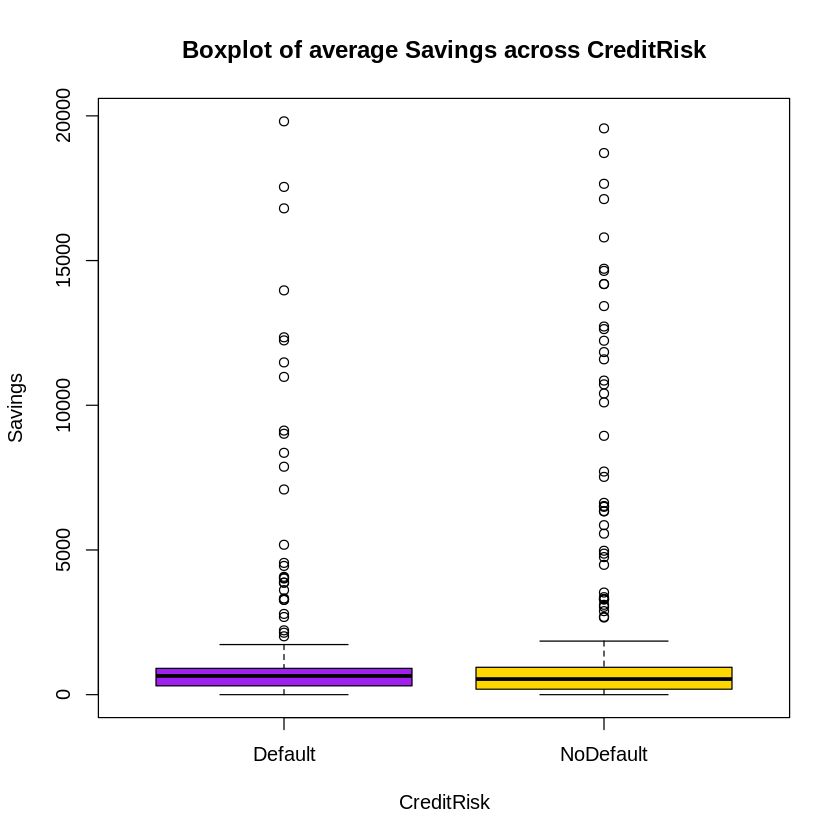

In [ ]:
# Testing to see if average "Savings" is the same across "CreditRisk".
# Boxplot of average "Savings" across "CreditRisk"
boxplot(Savings ~ CreditRisk, data = risk_data, col = c('purple', 'gold'), main = "Boxplot of average Savings across CreditRisk")

# Crosstab to get a better picture
print(aggregate(risk_data$Savings, list(risk_data$CreditRisk), FUN = mean))

In [ ]:
cat("\na:")
cat("\nLooking at the Boxplots, we can see that the two look similar, and the means of the two looks similar.")
cat("\nEven though the boxplots look similar, the crosstab shows that the means 'Default' and 'NoDefault' are not similar.")
cat("\n\nb:")
cat("\nNull Hypothesis: The two variables, 'Savings' and 'CreditRisk' are independent(related).")
cat("\nAlternative Hypothesis: The two variables, 'Savings' and 'CreditRisk' are not independent(related).")


a:
Looking at the Boxplots, we can see that the two look similar, and the means of the two looks similar.
Even though the boxplots look similar, the crosstab shows that the means 'Default' and 'NoDefault' are not similar.

b:
Null Hypothesis: The two variables, 'Savings' and 'CreditRisk' are independent(related).
Alternative Hypothesis: The two variables, 'Savings' and 'CreditRisk' are not independent(related).

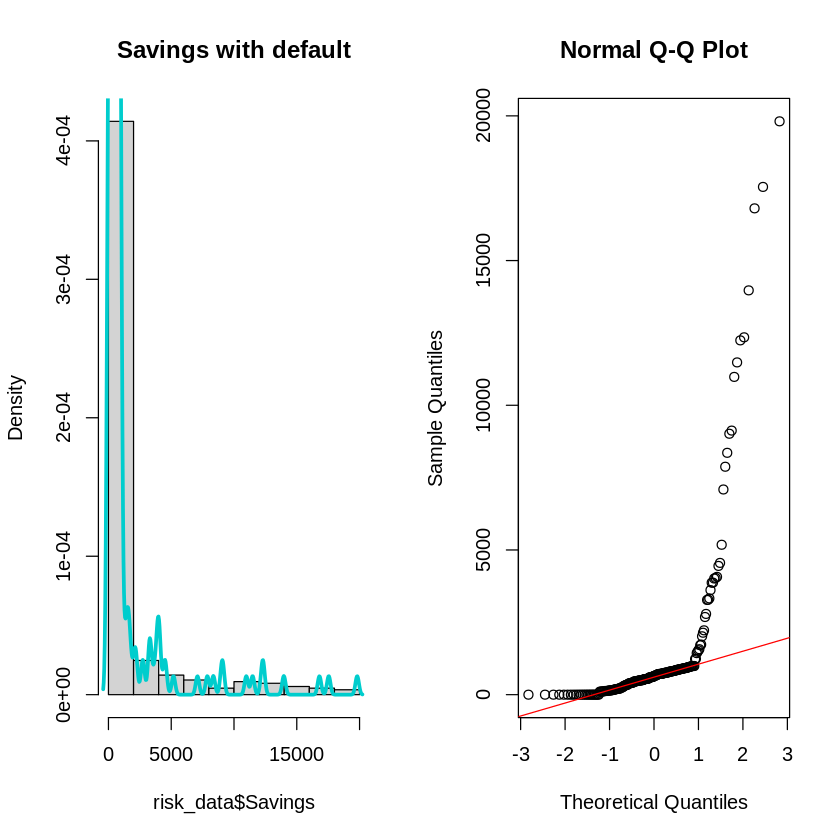

In [ ]:
# Checking the assumptions using both a QQ-plot and the AD-test
# Function for side by side plots
par(mfrow = c(1, 2))

# Creating data corresponding to the "Default" group.
risk_Default <- risk_data[risk_data$CreditRisk == 'Default', ]

# Histogram of 'Savings' for those with 'Default'.
hist(risk_data$Savings, col = "lightgray", main = "Savings with default", freq = FALSE)
lines(density(risk_Default$Savings), lwd = 3, col = "cyan3")

# Providing a QQ-plot
qqnorm(risk_Default$Savings)
qqline(risk_Default$Savings, col = 'red')

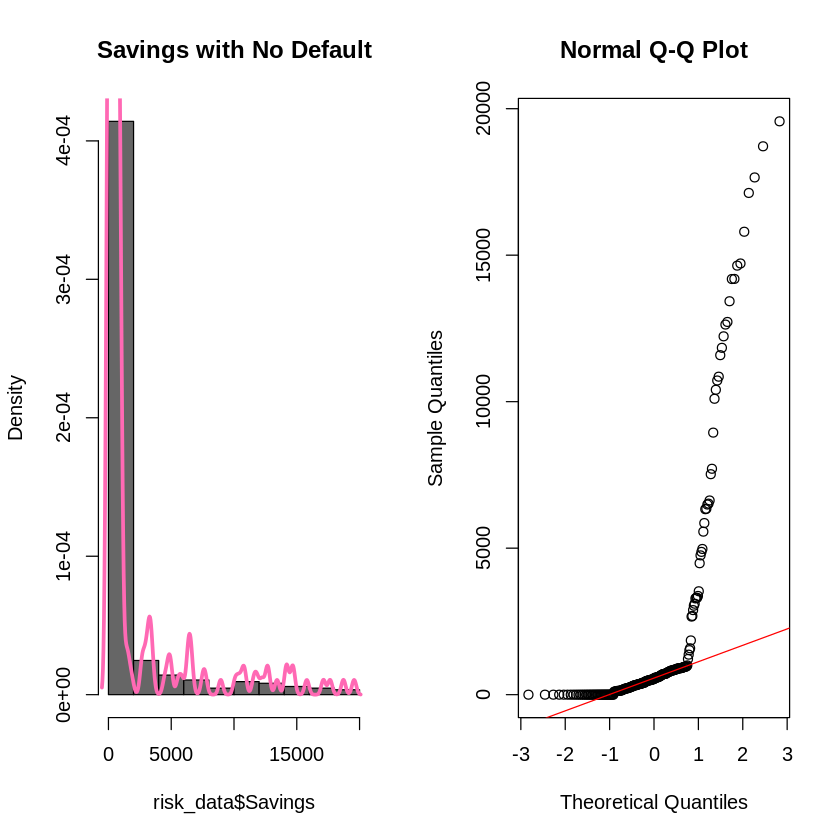

In [ ]:
# Side by side plots
par(mfrow = c(1, 2))

# Create a data corresponding to the "NoDefault" group.
risk_NoDefault <- risk_data[risk_data$CreditRisk == 'NoDefault', ]

# Histogram of 'Savings' for those with 'NoDefault'.
hist(risk_data$Savings, col = "grey40", main = "Savings with No Default", freq = FALSE)
lines(density(risk_NoDefault$Savings), lwd = 3, col = "hotpink")

# Providing a QQ-plot
qqnorm(risk_NoDefault$Savings)
qqline(risk_NoDefault$Savings, col = 'red')

In [ ]:
# Performing an AD-test
# install.packages("nortest")
library("nortest")

# Anderson-Darling test for those with 'Default'
ad.test(risk_Default$Savings)

# Anderson-Darling test for those with 'NoDefault'
ad.test(risk_NoDefault$Savings)


	Anderson-Darling normality test

data:  risk_Default$Savings
A = 42.011, p-value < 2.2e-16



	Anderson-Darling normality test

data:  risk_NoDefault$Savings
A = 39.91, p-value < 2.2e-16


In [ ]:
cat("d:")
cat("\nThe results of the QQ-plots and the two AD tests agree with one another.")
cat("\nThe QQ-plot tells us that the data does not follow a normal distribution and the AD-test agrees with the plots.")
cat("\n\nThe null hypothesis for the AD-test states: The data follows a normal distribution.")
cat("\nThe alternative hypothesis for the AD-test states: The data does NOT follow a normal distribution")
cat("\n\nThe data points on both QQ-plots do not follow the line/reference point.")
cat("\nThe AD-test for 'Default' and 'NoDefault' show that we have a significant p-value,")
cat("\nwhich gives us evidence of rejecting the null hypothesis and accepting the alternative hypothesis.")

d:
The results of the QQ-plots and the two AD tests agree with one another.
The QQ-plot tells us that the data does not follow a normal distribution and the AD-test agrees with the plots.

The null hypothesis for the AD-test states: The data follows a normal distribution.
The alternative hypothesis for the AD-test states: The data does NOT follow a normal distribution

The data points on both QQ-plots do not follow the line/reference point.
The AD-test for 'Default' and 'NoDefault' show that we have a significant p-value,
which gives us evidence of rejecting the null hypothesis and accepting the alternative hypothesis.

In [ ]:
# Performing the Mann-Whitney U test.
cat("i:")
cat("\nThe normality assumption has been violated as both the QQ-plot and AD-test show the data does not follow a normal distribution.")
wilcox.test(Savings ~ CreditRisk, data = risk_data, exact = FALSE)

i:
The normality assumption has been violated as both the QQ-plot and AD-test show the data does not follow a normal distribution.


	Wilcoxon rank sum test with continuity correction

data:  Savings by CreditRisk
W = 23679, p-value = 0.3836
alternative hypothesis: true location shift is not equal to 0


In [ ]:
cat("\nThe null hypothesis for the Mann-Whitney U test states: group means are the same.")
cat("\nThe alterative states: group means are not the same.")
cat("\n\nFrom the Mann-Whitney U test we see that the p-value is not less than 0.05, or rather, it is not statistically signifiant.")
cat("\nThus indicating we do NOT have enough evidence to support us rejecting the null hypothesis and accepting it instead.")


The null hypothesis for the Mann-Whitney U test states: group means are the same.
The alterative states: group means are not the same.

From the Mann-Whitney U test we see that the p-value is not less than 0.05, or rather, it is not statistically signifiant.
Thus indicating we do NOT have enough evidence to support us rejecting the null hypothesis and accepting it instead.

QUESTION 4

a:

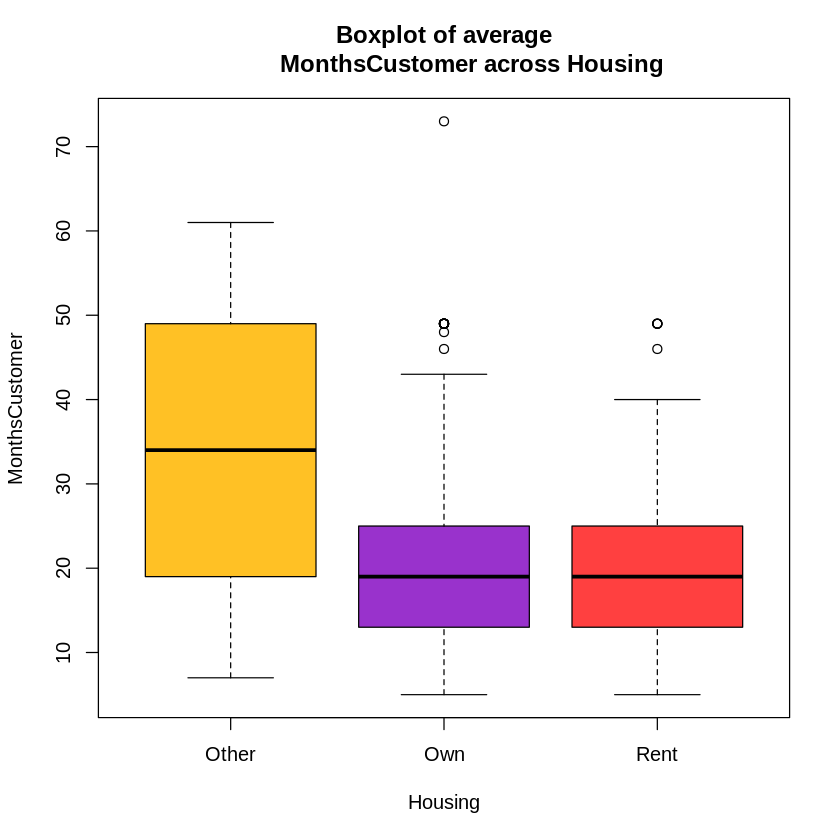

In [ ]:
# Testing to see if the average of 'MonthsCustomer' across 'Housing' is the same.
# Boxplot of 'MonthsCustomer' across 'Housing'.
boxplot(MonthsCustomer ~ Housing, data = risk_data, col = c('goldenrod1', 'darkorchid', 'brown1'), main = "Boxplot of average
        MonthsCustomer across Housing")

cat("a:")

In [ ]:
# Crosstab of 'MonthsCustomer' across 'Housing'
print(aggregate(risk_data$MonthsCustomer, list(risk_data$Housing), FUN = mean))

  Group.1        x
1   Other 32.34615
2     Own 21.82192
3    Rent 20.70370


In [ ]:
cat("From the boxplot and crosstab we see that the averages of 'MonthsCustomer' across 'Housing' look similar for 'Own' and 'Rent',")
cat("\nbut 'Other' does not look similar compared to the other two groups.")

From the boxplot and crosstab we see that the averages of 'MonthsCustomer' across 'Housing' look similar for 'Own' and 'Rent',
but 'Other' does not look similar compared to the other two groups.

In [ ]:
# Stating the null and alternative hypothesis
cat("b:")
cat("\nThe null hypothesis states: The two variables, 'MonthsCustomer' and 'Housing' are independent(related).")
cat("\nThe alternative hypothesis states: The two variables, 'MonthsCustomer' and 'Housing' are not independent(related).")

cat("\n\nHypotheses for Kruskal-Wallis test.")
cat("\nThe null hypothesis states: The means of all groups are equal to one another.")
cat("\nThe alternative hypothesis states: At least one group has a different mean.")

b:
The null hypothesis states: The two variables, 'MonthsCustomer' and 'Housing' are independent(related).
The alternative hypothesis states: The two variables, 'MonthsCustomer' and 'Housing' are not independent(related).

Hypotheses for Kruskal-Wallis test.
The null hypothesis states: The means of all groups are equal to one another.
The alternative hypothesis states: At least one group has a different mean.

c:

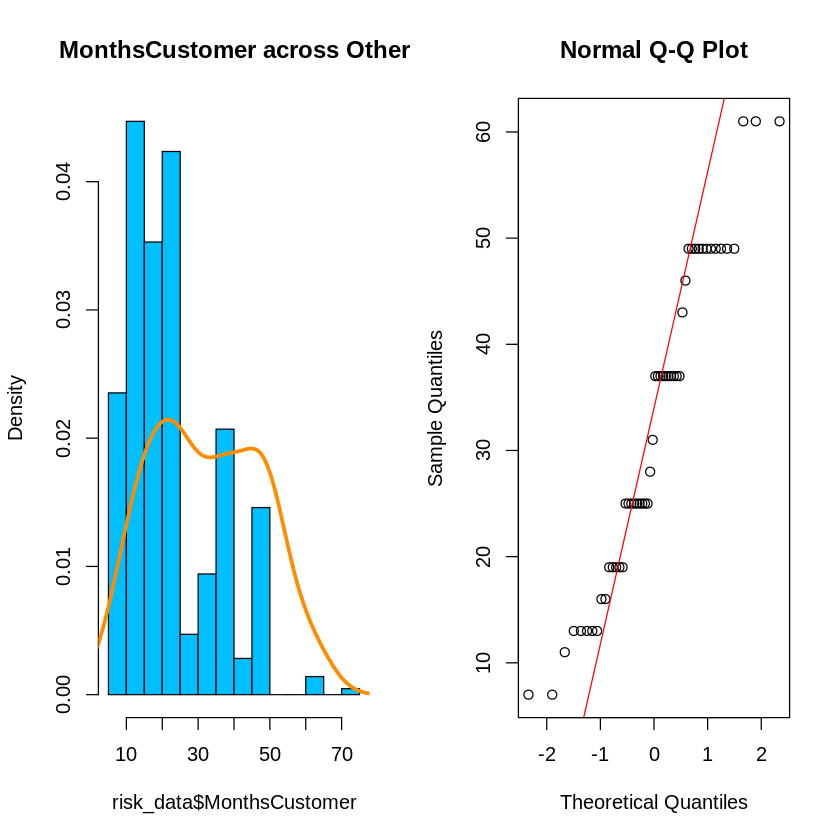

In [ ]:
# Checking the assumptions using both QQ-plots and AD-tests
cat("c:")

# QQ-plot and AD-test for 'Other' group.

# Function for side by side plots
par(mfrow = c(1, 2))

# Creating data corresponding to the "Other" group.
risk_Other <- risk_data[risk_data$Housing == 'Other', ]

# Histogram of 'MonthsCustomer' for those under 'Other'.
hist(risk_data$MonthsCustomer, col = "deepskyblue", main = "MonthsCustomer across Other", freq = FALSE)
lines(density(risk_Other$MonthsCustomer), lwd = 3, col = "darkorange")

# Providing a QQ-plot of Other
qqnorm(risk_Other$MonthsCustomer)
qqline(risk_Other$MonthsCustomer, col = 'red')

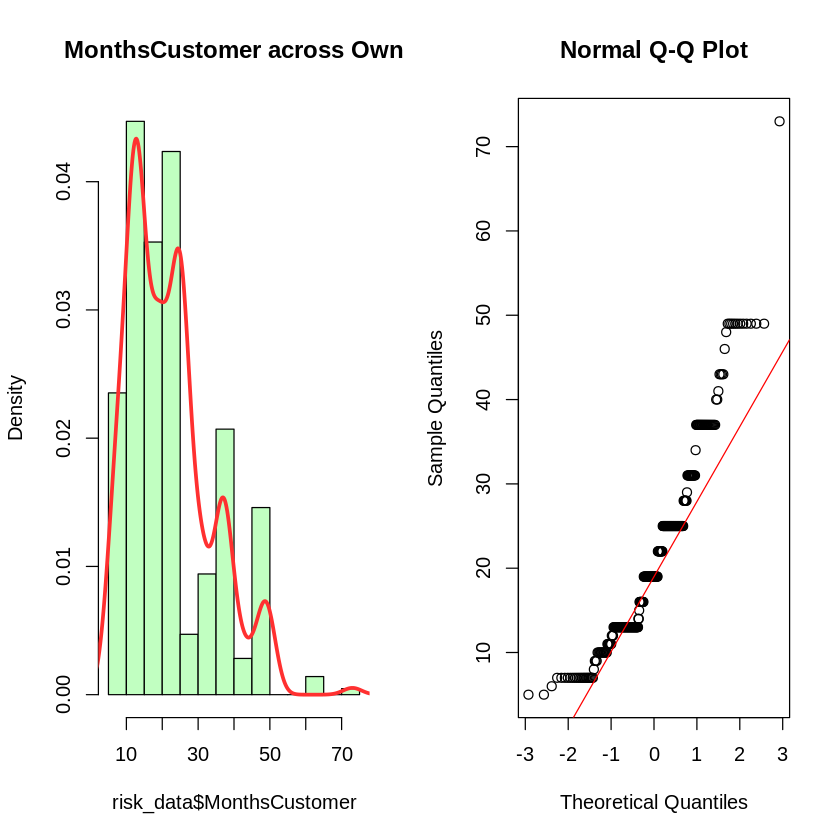

In [ ]:
# QQ-plot and AD-test for 'Own' group.

# Function for side by side plots
par(mfrow = c(1, 2))

# Creating data corresponding to the "Own" group.
risk_Own <- risk_data[risk_data$Housing == 'Own', ]

# Histogram of 'MonthsCustomer' for those under 'Own'.
hist(risk_data$MonthsCustomer, col = "darkseagreen1", main = "MonthsCustomer across Own", freq = FALSE)
lines(density(risk_Own$MonthsCustomer), lwd = 3, col = "firebrick1")

# Providing a QQ-plot of Own
qqnorm(risk_Own$MonthsCustomer)
qqline(risk_Own$MonthsCustomer, col = 'red')

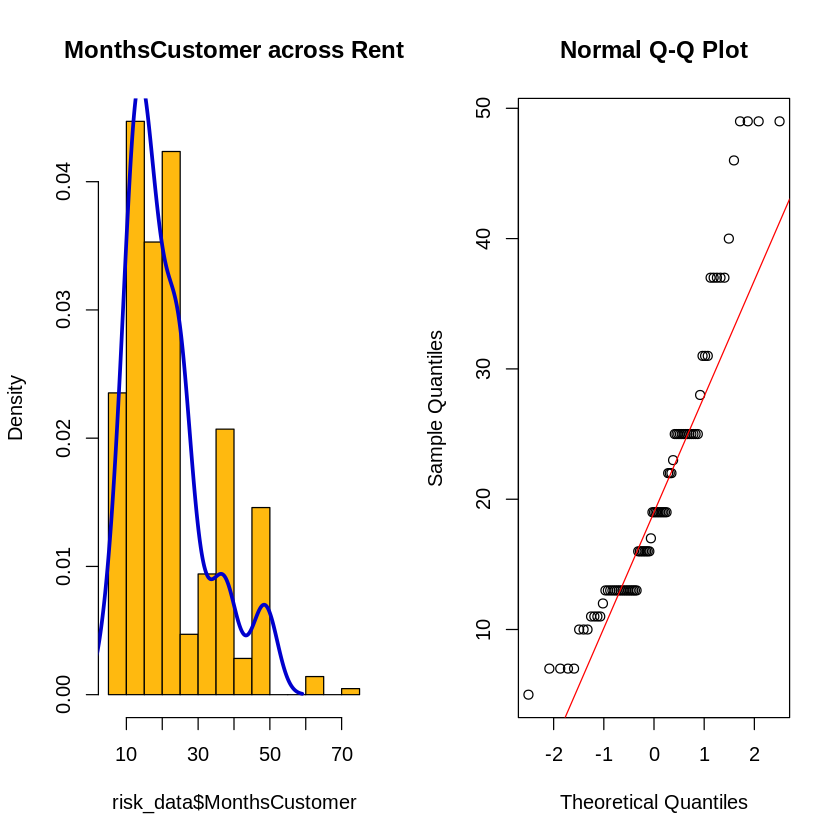

In [ ]:
# QQ-plot and AD-test for 'Rent' group.

# Function for side by side plots
par(mfrow = c(1, 2))

# Creating data corresponding to the "Rent" group.
risk_Rent <- risk_data[risk_data$Housing == 'Rent', ]

# Histogram of 'MonthsCustomer' for those under 'Rent'.
hist(risk_data$MonthsCustomer, col = "darkgoldenrod1", main = "MonthsCustomer across Rent", freq = FALSE)
lines(density(risk_Rent$MonthsCustomer), lwd = 3, col = "mediumblue")

# Providing a QQ-plot of Own
qqnorm(risk_Rent$MonthsCustomer)
qqline(risk_Rent$MonthsCustomer, col = 'red')

In [ ]:
# AD-test for each group

# Anderson-Darling test for those under 'Other'
ad.test(risk_Other$Savings)

# Anderson-Darling test for those with 'Own'
ad.test(risk_Own$Savings)

# Anderson-Darling test for those with 'Rent'
ad.test(risk_Rent$Savings)


	Anderson-Darling normality test

data:  risk_Other$Savings
A = 8.563, p-value < 2.2e-16



	Anderson-Darling normality test

data:  risk_Own$Savings
A = 59.381, p-value < 2.2e-16



	Anderson-Darling normality test

data:  risk_Rent$Savings
A = 12.886, p-value < 2.2e-16


In [ ]:
# Conclusion from the graphs
cat("d:")
cat("\n\nThe QQ-plots and AD-tests agree with each other that the two variables, 'MonthsCustomer and 'Housing', are not related.")
cat("\nWe know this as the QQ-plots for each group show that the data points on do not follow the line/reference point.")
cat("\nThe AD-tests further prove this point as the p-values for each group are statistically significiant, a value less than 0.05.")
cat("\nWith these p-values, it gives us enough evidence to reject the null hypothesis and accept the alternative hypothesis.")

d:

The QQ-plots and AD-tests agree with each other that the two variables, 'MonthsCustomer and 'Housing', are not related.
We know this as the QQ-plots for each group show that the data points on do not follow the line/reference point.
The AD-tests further prove this point as the p-values for each group are statistically significiant, a value less than 0.05.
With these p-values, it gives us enough evidence to reject the null hypothesis and accept the alternative hypothesis.

In [ ]:
# Has the normality assumption been violated?
cat("i:")
cat("\nThe normality assumption has been violated as both the QQ-plot and AD-test prove the data does not follow a normal distribution.")

# Performing a non-parametric test to make sure
# Conduct a Kruskal-Wallis test to check assumption.
# install.packages("FSA")
library("FSA")

# KW-test
kruskal.test(MonthsCustomer ~ Housing, data = risk_data)

i:
The normality assumption has been violated as both the QQ-plot and AD-test prove the data does not follow a normal distribution.


	Kruskal-Wallis rank sum test

data:  MonthsCustomer by Housing
Kruskal-Wallis chi-squared = 25.094, df = 2, p-value = 3.555e-06


In [ ]:
cat("From the KW-test we see that the p-value is statistically significant meaning we have evidence to reject the null hypothesis,")
cat("\nand accept the alternative hypothesis.")

From the KW-test we see that the p-value is statistically significant meaning we have evidence to reject the null hypothesis,
and accept the alternative hypothesis.

QUESTION 5

In [ ]:
# Conducting a post-hoc test to determine which group has the different mean.

# Post-hoc test
dunnTest(MonthsCustomer ~ Housing, data = risk_data)

Warning message:
“Housing was coerced to a factor.”
Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Holm method.




    Comparison        Z      P.unadj        P.adj
1  Other - Own 4.729554 2.250133e-06 6.750398e-06
2 Other - Rent 4.547923 5.417792e-06 1.083558e-05
3   Own - Rent 0.766650 4.432896e-01 4.432896e-01

In [ ]:
cat("From the post-hoc test we can see that the 'Own - Rent' group has the different mean as its p-value is not statistically")
cat("\nsignificant, less than 0.05, the actual value is 0.4432896.")

cat("\n\nWe would tell management that two of the groups, 'Other - Own' and 'Other and Rent' are statistically signficant,")
cat("\nand 'Own - Rent' is not statistically significant and either should not be included or new data should be acquired.")

From the post-hoc test we can see that the 'Own - Rent' group has the different mean as its p-value is not statistically
significant, less than 0.05, the actual value is 0.4432896.

We would tell management that two of the groups, 'Other - Own' and 'Other and Rent' are statistically signficant,
and 'Own - Rent' is not statistically significant and either should not be included or new data should be acquired.